In [35]:
import numpy as np
import matplotlib.pyplot as  plt
import cv2

In [58]:
data = np.load('D:/Study/ULMUniversity/Thesis/code/hgru_share/weights/gabors_for_contours_7.npy', allow_pickle=True, encoding='latin1')
data = data.item()
data = data['s1']
data = data[0]

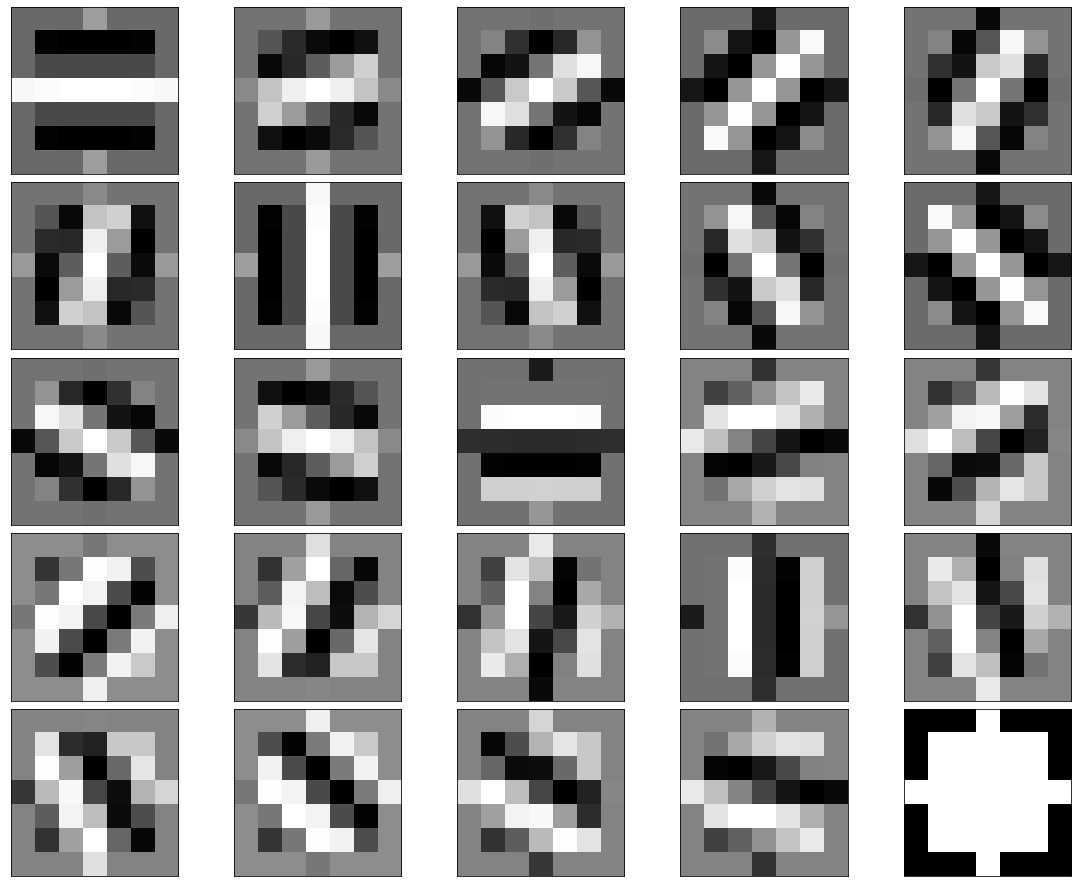

In [59]:
fig, axes = plt.subplots(5, 5, frameon=False, figsize=(20, 16))  # Initializes the figure with 110 suplots\n",
fig.subplots_adjust(hspace = .05, wspace=.001)  # Adjusts the spacing between the plots\n",
k = 0
for i in range(5):
    for j in range(5):  # Loop over the number of samples we want to plot\n",
        axes[i,j].imshow(data[:,:,0,k],cmap = 'gray')  # Plots the sample Image in graysclae\n",
        axes[i,j].get_xaxis().set_visible(False)  # Removes the x-axis from the plot\n",
        axes[i,j].get_yaxis().set_visible(False)  # Removes the y-axis from the plot\n",
        k+=1
fig.savefig('training_examples.png', bbox_inches='tight')  # Saves the figure

(3, 7, 7)


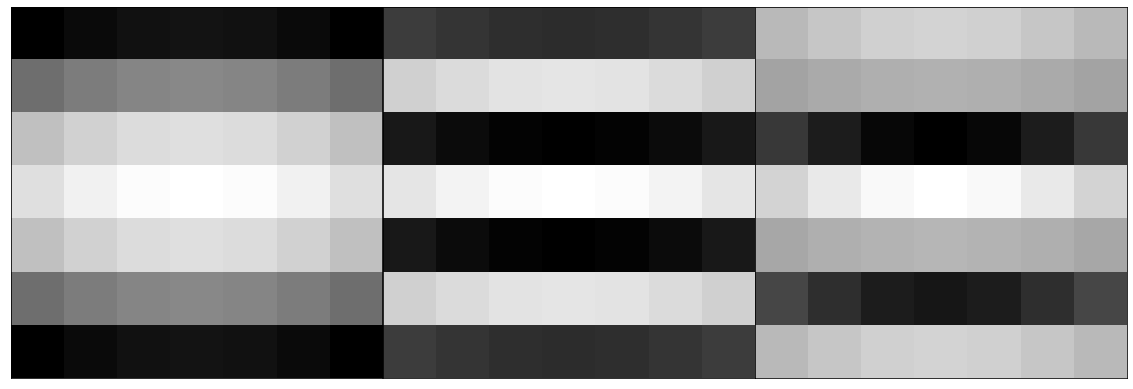

In [94]:
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
delta_theta = np.pi/12.0
# for theta in range(12):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
# theta = i * delta_theta
theta = np.pi/2
sigma = 3
for lamda in range(1,4):   #Range of wavelengths
    gamma = lamda/sigma            
    gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    ksize=7  #Try 15 for hidden image. Or 9 for others
    phi = np.pi/4 #0.8 for hidden image. Otherwise leave it to 0
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
    kernels.append(kernel)

kernels = np.array(kernels)
print(kernels.shape)
# fig, axes = plt.subplots(kernels.shape[0]//5, 5, frameon=False, figsize=(20, 16))  # Initializes the figure with 110 suplots
fig, axes = plt.subplots(1, 3, frameon=False, figsize=(20,20))
fig.subplots_adjust(hspace = .05, wspace=.001)  # Adjusts the spacing between the plots\n",
k = 0

for j in range(3):  # Loop over the number of samples we want to plot\n",
    axes[j].imshow(kernels[k,:,:], cmap ='gray')  # Plots the sample Image in graysclae\n",
    axes[j].get_xaxis().set_visible(False)  # Removes the x-axis from the plot\n",
    axes[j].get_yaxis().set_visible(False)  # Removes the y-axis from the plot\n",
    k+=1

In [96]:

def genGabor(ksize, sigma, theta, lamda, gamma, phi):
    return cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)  


In [101]:
from IPython.html.widgets import interact, interactive, fixed
def demoGabor(sigma, theta, lamda, phi):
    gamma = lamda/sigma
    myimshow(genGabor(256, sigma, theta, lamda, gamma, phi))
interact(demoGabor, sigma = (0,100,1), theta = (0,np.pi,np.pi/12), lamda = (0,100,1), phi = (-np.pi, np.pi+1,1))

interactive(children=(IntSlider(value=50, description='sigma'), FloatSlider(value=1.5707963267948966, descript…

<function __main__.demoGabor(sigma, theta, lamda, phi)>